<h1>Explore Movie Data</h1>

<h3>1. Instruction for Using the Notebook:</h3>

<h4>Data Source: <a href="https://www.kaggle.com/ruchi798/movies-on-netflix-prime-video-hulu-and-disney">Here</a></h4></br>
<h5>The Notebook has 2 main parts:</h5>
<ul>
    <li><b>Process Implemention:</b>
        <ul>
            <li>Import the dataset and search for movies</li>
            <li>Show movie details</li>
            <li>To use it:
                <ol>
                    <li>Make sure to have CSV file in the same folder(you can change the path by changing at f variable)</li>
                    <li>Run through all the cells to import modules</li>
                    <li>Input the movie name you want to search (It will show the movie details if exists)</li>
                    <li>If the movie does not exist in datasets, it will suggest some movies that has similar name</li>
                </ol>
            </li>
        </ul>
    </li>
    <li><b>Data Analytics:</b>
        <ul>
            <li>Describe the data and analyze through data frame and draw graphs</li>
            <li>To use it:
                <ol>
                    <li>Make sure to have CSV file in the same folder(you can change the path by changing data variable)</li>
                    <li>Run through all the cells to see the description and view the graphs</li>
                </ol>
            </li>
        </ul>
    </li>
    <li><b>Predictive Analytics (Coming soon)</b></li>
</ul>


<h3>2. Process Implementation</h3>

a. Import sqlite3 modules and import data from CSV

In [79]:
import sqlite3 #import sqlite 3 module

In [80]:
file = "database/movies.db" #database file
connection = sqlite3.connect(file)
c = connection.cursor() #establish the connection the database

In [81]:
c.execute("drop table if exists movies") #drop the old table if exists
c.execute("""
            create table movies (
            ID int primary key,
            Title varchar(255),
            Year int,
            Age char(3),
            IMDb float,
            Rotten_Tomatoes decimal(3,0),
            Netflix int,
            Hulu int,
            Prime_Video int,
            Disney int,
            Directors varchar(255),
            Genres varchar(255),
            Country varchar(255),
            Language varchar(255),
            Runtime int
            )""") #create table and define structure of table
connection.commit()

In [82]:
import csv #import csv module to use csv-related functions

In [83]:
delete_sql = "delete from movies" #delete old records from the table
c.execute(delete_sql)

f = open("dataset/MoviesOnStreamingPlatforms_updated.csv", encoding="utf8")
insert_sql = "insert into movies values (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?)" #insert record into tables
for row in csv.reader(f): 
    c.execute(insert_sql, row)
connection.commit()

b. Process, Update values for searching:

In [84]:
update_sql = "update movies set Title= Lower(Title)" #update value for processing
c.execute(update_sql)
connection.commit()

In [85]:
update_sql_netflix1 = "update movies set Netflix= 'Yes' where Netflix = 1" #update value
update_sql_netflix2 = "update movies set Netflix= 'No' where Netflix = 0"
c.execute(update_sql_netflix1)
c.execute(update_sql_netflix2)
connection.commit()

In [86]:
update_sql_hulu1 = "update movies set Hulu = 'Yes' where Hulu = 1" #update value
update_sql_hulu2 = "update movies set Hulu = 'No' where Hulu = 0"
c.execute(update_sql_hulu1)
c.execute(update_sql_hulu2)
connection.commit()

In [87]:
update_sql_primevideo1 = "update movies set prime_video = 'Yes' where prime_video = 1" #update value
update_sql_primevideo2 = "update movies set prime_video = 'No' where prime_video = 0"
c.execute(update_sql_primevideo1)
c.execute(update_sql_primevideo2)
connection.commit()

In [88]:
update_sql_disney1 = "update movies set disney = 'Yes' where disney = 1" #update value
update_sql_disney2 = "update movies set disney = 'No' where disney = 0"
c.execute(update_sql_disney1)
c.execute(update_sql_disney2)
connection.commit()

c. Show results:

In [89]:
show_10_sql = "select * from movies limit 10" #show the first 10 movies
c.execute(show_10_sql)
rows = c.fetchall()
for row in rows: 
    print(row)
connection.commit()

('ID', 'title', 'Year', 'Age', 'IMDb', 'Rotten Tomatoes', 'Netflix', 'Hulu', 'Prime Video', 'Disney+', 'Directors', 'Genres', 'Country', 'Language', 'Runtime')
(1, 'inception', 2010, '13+', 8.8, '87%', 'Yes', 'No', 'No', 'No', 'Christopher Nolan', 'Action,Adventure,Sci-Fi,Thriller', 'United States,United Kingdom', 'English,Japanese,French', 148)
(2, 'the matrix', 1999, '18+', 8.7, '87%', 'Yes', 'No', 'No', 'No', 'Lana Wachowski,Lilly Wachowski', 'Action,Sci-Fi', 'United States', 'English', 136)
(3, 'avengers: infinity war', 2018, '13+', 8.5, '84%', 'Yes', 'No', 'No', 'No', 'Anthony Russo,Joe Russo', 'Action,Adventure,Sci-Fi', 'United States', 'English', 149)
(4, 'back to the future', 1985, '7+', 8.5, '96%', 'Yes', 'No', 'No', 'No', 'Robert Zemeckis', 'Adventure,Comedy,Sci-Fi', 'United States', 'English', 116)
(5, 'the good, the bad and the ugly', 1966, '18+', 8.8, '97%', 'Yes', 'No', 'Yes', 'No', 'Sergio Leone', 'Western', 'Italy,Spain,West Germany', 'Italian', 161)
(6, 'spider-man: in

In [90]:
movies_name = str(input("Please enter the movies name: ")) #Get input movie name
custom_sql = "select Title, Netflix, Hulu, Prime_Video, Disney from movies where Title = lower('{0}')".format(movies_name) 
#select movies with the input title
c.execute(custom_sql)
rows = c.fetchall()
if not rows: #If there is no result
    if movies_name == '': 
        print("Please enter a name to find") #Ask to input a movie name if it is blank
    else:
        print("Sorry, we don't have the movie name {} in the system".format(movies_name.capitalize())) 
        print("Here are some related result, try searching for these movies:")
        #Suggest 5 movies close to the movie name
        select_alternate = "select Title from movies where Title Like '%{}%' limit 5".format(movies_name)
        c.execute(select_alternate)
        records = c.fetchall()
        if not records:
            print("Sorry, we can't find any movies similar to the name to input. Please input another movie name")
        else:
            for record in records:
                print("- {}".format(record[0].title()))
for row in rows: #If the movie exists, show the information of that movie
    print("The movie name is {}".format(row[0].title()))
    print("Available on Netflix: {}".format(row[1]))
    print("Available on Hulu: {}".format(row[2]))
    print("Available on Prime Video: {}".format(row[3]))
    print("Available on Disney: {}".format(row[4]))
connection.commit()

Please enter the movies name: 
Please enter a name to find


<h3>3. Data analysis and Report</h3>

a. Import packages and show dataframe

In [91]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [92]:
data = pd.read_csv("dataset/MoviesOnStreamingPlatforms_updated.csv", index_col=0)
data.head(10)
# data[['Title','Year']]
# data.loc[[2],["Title","Year","Netflix"]]
# plt.hist(data[['year']], bins = 3)
# plt.show()

,Title,Year,Age,IMDb,Rotten Tomatoes,Netflix,Hulu,Prime Video,Disney+,Directors,Genres,Country,Language,Runtime
ID,,,,,,,,,,,,,,
1,Inception,2010,13+,8.8,87%,1,0,0,0,Christopher Nolan,"Action,Adventure,Sci-Fi,Thriller","United States,United Kingdom","English,Japanese,French",148.0
2,The Matrix,1999,18+,8.7,87%,1,0,0,0,"Lana Wachowski,Lilly Wachowski","Action,Sci-Fi",United States,English,136.0
3,Avengers: Infinity War,2018,13+,8.5,84%,1,0,0,0,"Anthony Russo,Joe Russo","Action,Adventure,Sci-Fi",United States,English,149.0
4,Back to the Future,1985,7+,8.5,96%,1,0,0,0,Robert Zemeckis,"Adventure,Comedy,Sci-Fi",United States,English,116.0
5,"The Good, the Bad and the Ugly",1966,18+,8.8,97%,1,0,1,0,Sergio Leone,Western,"Italy,Spain,West Germany",Italian,161.0
6,Spider-Man: Into the Spider-Verse,2018,7+,8.4,97%,1,0,0,0,"Bob Persichetti,Peter Ramsey,Rodney Rothman","Animation,Action,Adventure,Family,Sci-Fi",United States,"English,Spanish",117.0
7,The Pianist,2002,18+,8.5,95%,1,0,1,0,Roman Polanski,"Biography,Drama,Music,War","United Kingdom,France,Poland,Germany","English,German,Russian",150.0
8,Django Unchained,2012,18+,8.4,87%,1,0,0,0,Quentin Tarantino,"Drama,Western",United States,"English,German,French,Italian",165.0
9,Raiders of the Lost Ark,1981,7+,8.4,95%,1,0,0,0,Steven Spielberg,"Action,Adventure",United States,"English,German,Hebrew,Spanish,Arabic,Nepali",115.0


b. Explore the data:

In [93]:
data.describe() #Describe the data

,Year,IMDb,Netflix,Hulu,Prime Video,Disney+,Runtime
count,16744.000000,16173.000000,16744.000000,16744.000000,16744.000000,16744.000000,16152.000000
mean,2003.014035,5.902751,0.212613,0.053930,0.737817,0.033684,93.413447
std,20.674321,1.347867,0.409169,0.225886,0.439835,0.180419,28.219222
min,1902.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2000.000000,5.100000,0.000000,0.000000,0.000000,0.000000,82.000000
50%,2012.000000,6.100000,0.000000,0.000000,1.000000,0.000000,92.000000
75%,2016.000000,6.900000,0.000000,0.000000,1.000000,0.000000,104.000000
max,2020.000000,9.300000,1.000000,1.000000,1.000000,1.000000,1256.000000


What we know from above data:
- There are 16744 movies in the record.
- Average IBDb rating score is 5.902
- The record have the movies from 1902 to 2020
- The longest movies is 1256 minutes long
- Hulu is platform that has the least movies

Find the average and median IMDb score of each genres

In [94]:
data.pivot_table(values = "IMDb", index = "Genres", aggfunc= [np.mean, np.median]) #create pivot table with arregate function to calculate mean and median

,mean,median
,IMDb,IMDb
Genres,,
Action,4.865734,4.90
"Action,Adventure",4.972340,5.10
"Action,Adventure,Biography",6.200000,6.50
"Action,Adventure,Biography,Drama,History",7.633333,7.90
"Action,Adventure,Biography,Drama,History,Romance,War",2.000000,2.00
...,...,...
Western,5.759130,5.80
"Western,Comedy",4.050000,4.05


Find the average score of movies in each genre by runtime

In [95]:
data.groupby(["Genres", "Runtime"])[["IMDb"]].mean()

IMDb
Genres          Runtime      
Action          45.0     7.00
                52.0      NaN
                69.0      NaN
                70.0     5.05
                72.0     4.15
...                       ...
Western,Comedy  86.0     3.70
                102.0    4.40
Western,Horror  89.0     3.90
Western,Mystery 56.0     6.30
Western,War     56.0     5.20

[8371 rows x 1 columns]

Show some latest movies in the year of 2020

In [96]:
data[data["Year"]== 2020] #We still have a lot movies come out during the pandemic

,Title,Year,Age,IMDb,Rotten Tomatoes,Netflix,Hulu,Prime Video,Disney+,Directors,Genres,Country,Language,Runtime
ID,,,,,,,,,,,,,,
66,To All the Boys I've Loved Before,2020,13+,7.2,97%,1,0,0,0,Susan Johnson,"Comedy,Drama,Romance",United States,English,99.0
113,Extraction,2020,18+,6.8,68%,1,0,0,0,Sam Hargrave,"Action,Thriller",United States,"English,Hindi,Bengali",116.0
159,Miss Americana,2020,18+,7.4,93%,1,0,0,0,Lana Wilson,Documentary,United States,English,85.0
249,The Willoughbys,2020,7+,6.4,90%,1,0,0,0,"Kris Pearn,Cory Evans,Rob Lodermeier","Animation,Adventure,Comedy,Family","Canada,United States,United Kingdom",English,90.0
284,Crip Camp: A Disability Revolution,2020,18+,7.8,100%,1,0,0,0,"James Lebrecht,Nicole Newnham",Documentary,United States,English,106.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16569,Lamp Life,2020,NaN,6.7,NaN,0,0,0,1,Valerie LaPointe,"Animation,Short,Family,Fantasy",United States,English,7.0
16635,A Celebration of the Music from Coco,2020,NaN,7.4,NaN,0,0,0,1,Ron de Moraes,Music,United States,English,NaN
16636,In the Footsteps of Elephant,2020,NaN,7.8,NaN,0,0,0,1,"Vanessa Berlowitz,Tom Stephens","Documentary,Adventure,Family",United States,English,85.0


c. Make the bar race:

Find top 10 genres that has the most movies

In [97]:
ok = data.groupby("Genres")["Title"].nunique().sort_values(ascending=False).head(10)
ok.index

Index(['Drama', 'Documentary', 'Comedy', 'Comedy,Drama', 'Horror',
       'Drama,Romance', 'Comedy,Drama,Romance', 'Horror,Thriller',
       'Comedy,Romance', 'Drama,Thriller'],
      dtype='object', name='Genres')

Count number of unique movies in each year by genres

In [98]:
#create the pivot table and use nunique aggregate function
df = data.pivot_table(values = "Title", index = "Year", columns = "Genres", aggfunc= pd.Series.nunique, fill_value = 0).sort_values("Year", ascending= True)
df

Genres,Action,"Action,Adventure","Action,Adventure,Biography","Action,Adventure,Biography,Drama,History","Action,Adventure,Biography,Drama,History,Romance,War","Action,Adventure,Biography,Drama,Romance","Action,Adventure,Comedy","Action,Adventure,Comedy,Crime","Action,Adventure,Comedy,Crime,Drama,Romance","Action,Adventure,Comedy,Crime,Drama,Thriller",...,"Thriller,Mystery","Thriller,War",War,"War,Documentary","War,Drama",Western,"Western,Comedy","Western,Horror","Western,Mystery","Western,War"
Year,,,,,,,,,,,,,,,,,,,,,
1902,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1912,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1913,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1915,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1916,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016,7,3,0,0,0,0,2,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2017,12,2,0,0,0,0,2,0,0,0,...,0,0,0,0,0,2,0,0,0,0
2018,8,2,0,0,0,0,1,2,0,1,...,0,0,0,0,0,2,0,0,0,0


Show the result of top 10 genres through years

In [99]:
dff = df[ok.index] #only show result of top 10 genres
dff

Genres,Drama,Documentary,Comedy,"Comedy,Drama",Horror,"Drama,Romance","Comedy,Drama,Romance","Horror,Thriller","Comedy,Romance","Drama,Thriller"
Year,,,,,,,,,,
1902,0,0,0,0,0,0,0,0,0,0
1912,0,0,0,0,0,0,0,0,0,0
1913,0,0,0,0,0,0,0,0,0,0
1915,1,0,0,0,0,0,0,0,0,0
1916,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
2016,116,120,85,31,26,31,27,31,16,23
2017,131,148,122,55,32,36,21,25,22,19
2018,115,147,120,36,29,24,28,24,20,15


Find cumulative total number of movies through the years

In [100]:
ab = dff.cumsum()
ab

Genres,Drama,Documentary,Comedy,"Comedy,Drama",Horror,"Drama,Romance","Comedy,Drama,Romance","Horror,Thriller","Comedy,Romance","Drama,Thriller"
Year,,,,,,,,,,
1902,0,0,0,0,0,0,0,0,0,0
1912,0,0,0,0,0,0,0,0,0,0
1913,0,0,0,0,0,0,0,0,0,0
1915,1,0,0,0,0,0,0,0,0,0
1916,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
2016,1030,853,687,332,364,315,274,240,224,179
2017,1161,1001,809,387,396,351,295,265,246,198
2018,1276,1148,929,423,425,375,323,289,266,213


<b>Function to define the style of the graph to make it look nicer</b>

In [101]:
def nice_axes(ax):
    ax.set_facecolor('.8') #set the face color of the axes
    ax.tick_params(labelsize=8, length=0) #Change the appearance of ticks
    ax.grid(True, axis='x', color='white') #Configure the grid lines
    ax.set_axisbelow(True)
    [spine.set_visible(False) for spine in ax.spines.values()]

<b> Function to process and prepare the rank data:</b><br />
<ul>
    <li>Rank the genres base on its data in top 10</li>
    <li>It helps the value keep its color in the bar graph when the order is changed</li>
    <li>Interpolate the data so it creates the transition between the increase in data</li>
    <li>It makes the bar race more smoothly</li>
        <li>Rank the genres base on its data in top 10</li>
    <li>It helps the value keep its color in the bar graph when the order is changed</li>

In [102]:
def prepare_data(df, steps=5):
    abc = ab.loc[1900:2020].reset_index() #reset the index to add transitioning value
    abc.index = abc.index*5 #Add 5 transitioning values between each year
    last_idx = abc.index[-1] + 1
    df_expanded = abc.reindex(range(last_idx))
    df_expanded['Year'] = df_expanded['Year'].fillna(method='ffill').astype(int)
    df_expanded = df_expanded.set_index('Year') #Set Year column back to the index
    df_expanded = df_expanded.interpolate() #Interpolate data value value for more smoothly transitioning
    df_rank_expanded = df_expanded.rank(axis=1, method='first') #Rank the value to keep its color
    df_rank_expanded = df_rank_expanded.interpolate() #Interpolate rank value for more smoothly transitioning
    return df_expanded, df_rank_expanded

<b>Import package and Create Animation</b>

In [103]:
from matplotlib.animation import FuncAnimation

def init():
    ax.clear()
    nice_axes(ax)
    ax.set_ylim(.2, 6.8) #Set the y-axis view limits

def update(i):
    for bar in ax.containers:
        bar.remove()
    y = df_rank_expanded.iloc[i] #The genres
    width = df_expanded.iloc[i] #Number of movies value
    ax.barh(y=y, width=width, color=colors, tick_label=labels) #Draw bar graph
    date_str = df_expanded.index[i] #Take the date in index column
    ax.set_title(f'Number of Movies by Genres - {date_str}')
    
fig = plt.Figure(figsize=(4, 2.5), dpi=144) #create figure
ax = fig.add_subplot()
colors = plt.cm.Dark2(range(6))
anim = FuncAnimation(fig=fig, func=update, init_func=init, frames=len(df_expanded), 
                     interval=200, repeat=False) #Configure the video

Display the bar race

In [104]:
from IPython.display import HTML
html = anim.to_html5_video()
HTML(html)

In [105]:
anim.save('videos/moviesbygenres.mp4') #Save the bar race video to local

d. Number of Movies throughout the years graph:

In [106]:
df = data.groupby('Year')[['Title']].nunique() #Find number of unique movies every year
df

,Title
Year,
1902,1
1912,1
1913,2
1915,4
1916,1
...,...
2016,1206
2017,1401
2018,1285


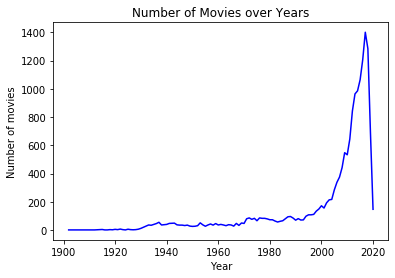

In [107]:
plt.plot(df.index, df[['Title']], color="blue") #Draw graph
plt.xlabel("Year") #Label x-axis
plt.ylabel("Number of movies") #Label y-axis
plt.title("Number of Movies over Years") #Label the Title
plt.show() #Show the graph

e. Compare movies on different streamming platform:

In [108]:
df = data[["Netflix","Hulu", "Prime Video", "Disney+"]].sum() #Calculate total movies of each platform
df

Netflix         3560
Hulu             903
Prime Video    12354
Disney+          564
dtype: int64

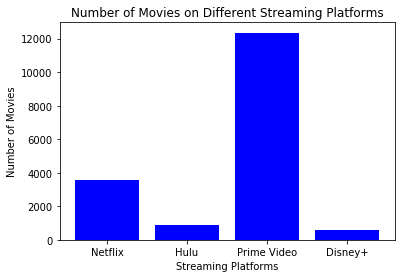

In [109]:
name = ["Netflix", "Hulu", "Prime Video", "Disney+"]
plt.bar(name, df, align="center", color="blue") #Draw bar graph
plt.xlabel("Streaming Platforms") #Label X-axis
plt.ylabel("Number of Movies") #label y-axis
plt.title("Number of Movies on Different Streaming Platforms") #Label the tile
plt.show() #Show the graph

f. Top 5 countries has the most movies

In [110]:
#Find top 5 countries has the most movies
movies_by_country = data.groupby('Country')['Title'].count().reset_index().sort_values('Title',ascending = False).head(5).rename(columns = {'Title':'MovieCount'})
movies_by_country

,Country,MovieCount
1059,United States,8776
477,India,1064
908,United Kingdom,905
117,Canada,555
34,Australia,202


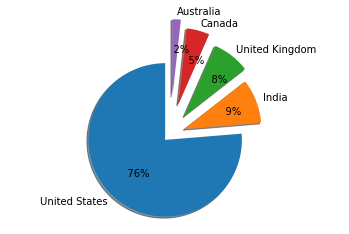

In [111]:
explodeTuple = (0.1, 0.2, 0.3, 0.4, 0.5) #Making the wedge to explode out for easier to see
plt.pie(movies_by_country["MovieCount"], explode= explodeTuple, labels = movies_by_country["Country"], autopct='%5.0f%%',
        shadow=True, startangle=90) #Draw Pie chart
plt.axis('equal') #Ensure the pie chart is circle
plt.show() #Show the graph

<h3>4. Predictive Analytics: Coming soon</h3>

<h3>5. Wrap Up:</h3>
<ul>
    <li>There are a lot of movies are being produces every year and the rate is increasing throughout the years</li>
    <li>There are lot of genres and combination of genres but Drama is still one of the most favorite types of movie</li>
    <li>Prime video is the streaming platform that has the most movies</li>
    <li>Hollywood, or USA is the symbol of movies industry, country that has been producing most movies</li>
</ul>
We explored some interesting trends around movies, genres, countries, and platforms